# Autor: Filip Savić

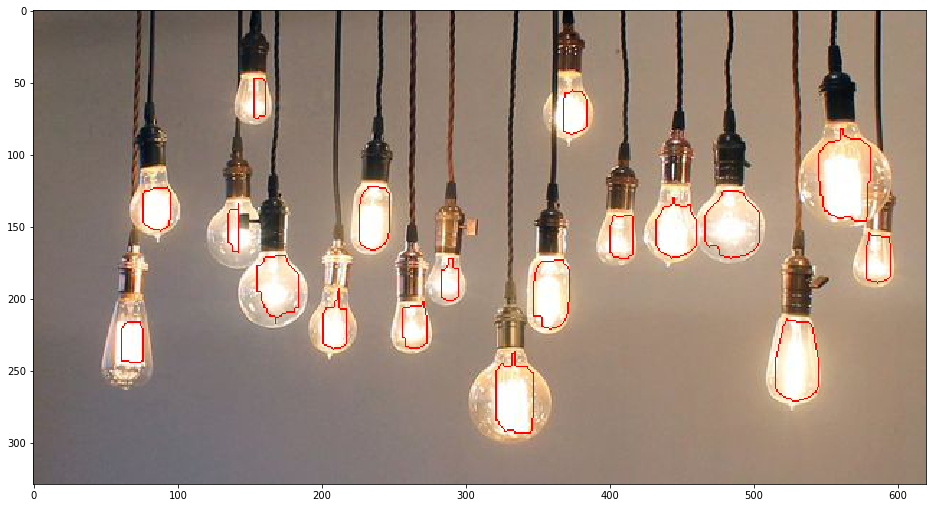

In [643]:
import matplotlib.pyplot as plt  
# iscrtavanje slika i plotova unutar samog browsera
%matplotlib inline

import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 16,12

import numpy as np
import cv2 # OpenCV biblioteka

img = cv2.imread('../slike/bulbs.jpg')  # ucitavanje slike sa diska
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # konvertovanje iz BGR u RGB model boja (OpenCV ucita sliku kao BGR)
img = img[200:,50:670] # isijecemo plafon

img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

#                       (slika koja se binarizuje, prag, u koju boju ga boji, tip prag-a <binarizacija> )
ret, img_bin = cv2.threshold(img_gray, 180, 255, cv2.THRESH_BINARY) # ret je vrednost praga, image_bin je binarna slika

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 7))
img_ero = cv2.erode(img_bin, kernel, iterations=4)
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (1, 7))
img_ero = cv2.dilate(img_ero, kernel, iterations=3)

# konture
img_with_conts, contours, hierarchy = cv2.findContours(img_ero, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(img, contours, -1, (255, 0, 0), 1)
plt.imshow(img, 'gray')

In [644]:
print 'Na slici ima %d sijalica.' % len(contours)

Na slici ima 18 sijalica.
